Importing Keras libraries

In [51]:
import keras

Importing ImageDataGenerator from Keras

In [52]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Defining the Parameters

In [53]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

Applying ImageDataGenerator functionality to train dataset


In [54]:
x_train = train.flow_from_directory("/content/drive/MyDrive/forest fire/Dataset/Dataset/train_set",
                                          target_size=(64,64),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 441 images belonging to 2 classes.


Applying ImageDataGenerator functionality to test dataset

In [55]:
x_test = test.flow_from_directory("/content/drive/MyDrive/forest fire/Dataset/Dataset/test_set",
                                          target_size=(64,64),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [56]:
x_test.class_indices

{'forest': 0, 'with fire': 1}

In [57]:
x_test.class_indices

{'forest': 0, 'with fire': 1}

Importing Model Building Libraries


In [58]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Initializing the model

In [59]:
model =Sequential()

Adding CNN Layers

In [60]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

Add Dense layers

In [61]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

configuring the learning process

In [62]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

Training the model

In [63]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=5,validation_data=x_test,validation_steps=20)

Epoch 1/5
14/14 [==============================] - ETA: 0s - loss: 0.8783 - accuracy: 0.7506

14/14 [==============================] - 23s 2s/step - loss: 0.8783 - accuracy: 0.7506 - val_loss: 0.1509 - val_accuracy: 0.9752
Epoch 2/5
14/14 [==============================] - 18s 1s/step - loss: 0.2946 - accuracy: 0.8639
Epoch 3/5
14/14 [==============================] - 15s 1s/step - loss: 0.1919 - accuracy: 0.9138
Epoch 4/5
14/14 [==============================] - 17s 1s/step - loss: 0.1427 - accuracy: 0.9342
Epoch 5/5
14/14 [==============================] - 15s 1s/step - loss: 0.1228 - accuracy: 0.9546



Save The Model

In [64]:
model.save("forest1.h5")

Predictions

In [65]:
predictions = model.predict(x_test)
predictions = np.round(predictions)

4/4 [==============================] - 5s 1s/step


In [66]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [67]:
print(len(predictions))

121


In [68]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2

In [69]:
#load the saved model
model = load_model("forest1.h5")

In [70]:
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(64,64))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" fire")
  elif val == 0:
      print("no fire")

In [71]:
predictImage("/content/drive/MyDrive/forest fire/Dataset/Dataset/test_set/with fire/FORESTFIRE (1).jpg")

1/1 [==============================] - 0s 59ms/step
[[1.]]
 fire


Open cv2 for video processing

In [72]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
#import opencv librariy
#import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [75]:
#load the saved model
model = load_model(r'forest1.h5')
#define the features
name = ['forest','with forest']

Creating An Account in Twilio Service

In [76]:
account_sid='ACcd50918435afdf4a48f0b5b00c086b25'
auth_token='5ca3f7bf591627441cefd46af0a4e746'
client=Client(account_sid,auth_token)
message=client.messages \
.create(
    body='forest fire is detected,stay alert',
#use twilio free number
    from_='+14635832381',
#to number
    to='+919025868474')
print(message.sid)

SM443c6d704ac63738a981743988aec407


Sending Alert Message

In [77]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
def message(val):
  if val==1:
    from twilio.rest import Client
    print('Forest fire')
    account_sid='ACcd50918435afdf4a48f0b5b00c086b25'
    auth_token='5ca3f7bf591627441cefd46af0a4e746'
    client=Client(account_sid,auth_token)
    message=client.messages \
     .create(
        body='forest fire is detected, stay alert',
        #use twilio free number
        from_='+14635832381',
        #to number
        to='+919025868474')
    print(message.sid)
    print("Fire detected")
    print("SMS Sent!")
  elif val==0:
    print('No Fire')

1/1 [==============================] - 0s 62ms/step


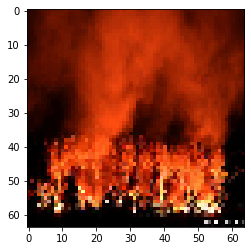

Forest fire
SMa6813c562eb706375acd45adfa28b735
Fire detected
SMS Sent!


In [79]:
from matplotlib import pyplot as plt
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/drive/MyDrive/forest fire/Dataset/Dataset/test_set/with fire/19464620_401.jpg',target_size=(64,64))
Y = image.img_to_array(img1)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img1)
plt.show()
message(val)

1/1 [==============================] - 0s 22ms/step


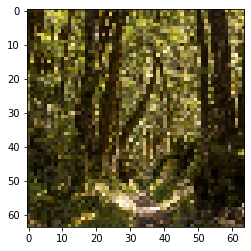

No Fire


In [80]:
img2 = image.load_img('/content/drive/MyDrive/forest fire/Dataset/Dataset/test_set/forest/5472.jpg',target_size=(64,64))
Y = image.img_to_array(img2)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img2)
plt.show()
message(val)

In [81]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
%matplotlib inline

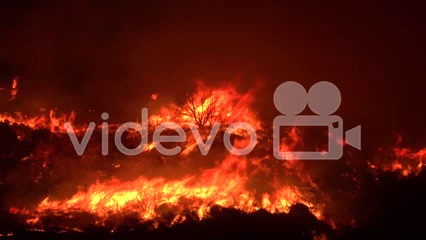

1/1 [==============================] - 0s 58ms/step
Forest fire
SM66ebaf9cb4c4f4cf0ca9a8ae3cab1dce
Fire detected
SMS Sent!


In [82]:
cap = cv2.VideoCapture(r'/content/forest fire video.webm')
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("forest1.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==1:
      print('Forest fire')
      break
    else:
      print("No fire")
      break
 
# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()
from twilio.rest import Client
from playsound import playsound
if pred==1:
  account_sid='ACcd50918435afdf4a48f0b5b00c086b25'
  auth_token='5ca3f7bf591627441cefd46af0a4e746'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+14635832381',
      #to number
      to='+91 9025868474')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
